In [1]:
import tensorflow as tf
import input_data
import numpy as np
import random

In [2]:
hidden_size = 100

In [3]:
def get_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def get_bias(shape):
    return tf.Variable(np.zeros(shape), dtype=tf.float32)

Inputs

In [4]:
input_ = tf.placeholder(tf.float32, [None, 784])
label  = tf.placeholder(tf.float32, [None, 10])

Model

In [5]:
# Input layer to hidden layer
W1 = get_weights([784, hidden_size])
b1 = get_bias([hidden_size])

# Hidden layer to output layer
W2 = get_weights([hidden_size, 10])
b2 = get_bias([10])

# Activations
hidden = tf.sigmoid(tf.matmul(input_, W1) + b1)
output = tf.sigmoid(tf.matmul(hidden, W2) + b2)

Loss and Optimizer

In [6]:
# Loss
clipped_output         = tf.clip_by_value(output, 1e-10, 1.0)
clipped_1_minus_output = tf.clip_by_value(1 - output, 1e-10, 1.0)

loss = -tf.reduce_sum(label * tf.log(clipped_output) + (1 - label) * tf.log(clipped_1_minus_output))
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(output, 1), tf.argmax(label, 1)), tf.float32))

In [7]:
# Optimizer
train_op = tf.train.AdamOptimizer().minimize(loss)

Get some data

In [8]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

# Validation split
valid_ratio = float(10)/55
train_pairs = zip(mnist.train.images, mnist.train.labels)
random.shuffle(train_pairs)
train_X, train_Y = zip(*train_pairs[int(valid_ratio*len(train_pairs)):])
valid_X, valid_Y = zip(*train_pairs[:int(valid_ratio*len(train_pairs))])

# Test pairs
test_X, test_Y = mnist.test.images, mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
print 'Training:', len(train_X)
print 'Validation:', len(valid_X)
print 'Test:', len(test_X)

Training: 45000
Validation: 10000
Test: 10000


Training

In [10]:
batch_size = 64

In [17]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

for i in range(20):
    train_loss = []
    valid_loss = []
    valid_acc  = []
    test_loss  = []
    test_acc   = []

    for j in range(len(train_X)/batch_size):
        start = j * batch_size
        end   = (j+1) * batch_size
        loss_, _ = sess.run([loss, train_op], feed_dict={input_: train_X[start:end], label: train_Y[start:end]})

        train_loss.append(loss_)

    for j in range(len(valid_X)/batch_size):
        start = j * batch_size
        end   = (j+1) * batch_size
        loss_, acc_ = sess.run([loss, accuracy], feed_dict={input_: valid_X[start:end], label: valid_Y[start:end]})

        valid_loss.append(loss_)
        valid_acc.append(acc_)

    for j in range(len(test_X)/batch_size):
        start = j * batch_size
        end   = (j+1) * batch_size
        loss_, acc_ = sess.run([loss, accuracy], feed_dict={input_: test_X[start:end], label: test_Y[start:end]})

        test_loss.append(loss_)
        test_acc.append(acc_)

    print 'End of epoch %d:' % (i+1)
    print 'Training loss:', np.mean(train_loss), \
          'Validation loss:', np.mean(valid_loss), \
          'Test loss:', np.mean(test_loss)
    print ('Validation accuracy: %g%%' % (np.mean(valid_acc)*100)), \
          ('Test accuracy: %g%%' % (np.mean(test_acc)*100))
    print

End of epoch 1:
Training loss: 141.475 Validation loss: 67.6503 Test loss: 65.8488
Validation accuracy: 88.1711% Test accuracy: 88.9623%

End of epoch 2:
Training loss: 48.868 Validation loss: 39.3831 Test loss: 37.4876
Validation accuracy: 91.2961% Test accuracy: 91.9171%

End of epoch 3:
Training loss: 34.1555 Validation loss: 32.1069 Test loss: 30.2752
Validation accuracy: 92.3878% Test accuracy: 92.8285%

End of epoch 4:
Training loss: 28.5894 Validation loss: 28.4068 Test loss: 26.6187
Validation accuracy: 93.1791% Test accuracy: 93.72%

End of epoch 5:
Training loss: 25.2039 Validation loss: 25.9441 Test loss: 24.1656
Validation accuracy: 93.76% Test accuracy: 94.1707%

End of epoch 6:
Training loss: 22.7015 Validation loss: 24.0699 Test loss: 22.3005
Validation accuracy: 94.2107% Test accuracy: 94.6314%

End of epoch 7:
Training loss: 20.6743 Validation loss: 22.5367 Test loss: 20.8084
Validation accuracy: 94.4912% Test accuracy: 95.002%

End of epoch 8:
Training loss: 18.9572 V

# Demonstration

In [18]:
from matplotlib.pyplot import imshow

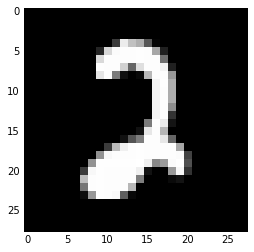

In [19]:
%matplotlib inline
# Input
this_input = random.sample(test_X, 1)[0]
imshow(np.reshape(this_input, (28, 28)), interpolation='nearest', cmap='Greys_r')

In [20]:
# Get output
this_output = sess.run(output, feed_dict={input_: [this_input]})
print np.argmax(this_output[0])

2
